### Библиотеки / данные

импортируем библиотеки numpy и pandas

In [1]:
import numpy as np
import pandas as pd

импортируем библиотеку matplotlib для построения графиков

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

задаем некоторые настройки pandas, регулирующие формат вывода

In [3]:
pd.options.display.max_rows = 10

- считываем данные 
- используем столбец Symbol в качестве индекса 
- считываем только те столбцы ['Symbol', 'Sector', 'Price', 'Book Value', 'Market Cap', 'Dividend Yield']

| Column Name        | Description
| ------------- |:-------------:|
|Symbol|Сокращенное название организации|
|Name|Полное название организации|
|Sector|Сектор экономики|
|Price|Стоимость акции|
|Dividend Yield|Дивидендная доходность|
|Price/Earnings|Цена / прибыль|
|Earnings/Share|Прибыль на акцию|
|Book Value|Балансовая стоимость компании|
|52 week low|52-недельный минимум|
|52 week high|52-недельный максимум|
|Market Cap|Рыночная капитализация|
|EBITDA|**E**arnings **b**efore **i**nterest, **t**axes, **d**epreciation and **a**mortization|
|Price/Sales|Цена / объём продаж|
|Price/Book|Цена / балансовая стоимость|
|SEC Filings|Ссылка *sec.gov*|

In [5]:
sp500 = pd.read_csv("sp500.csv",
                    index_col='Symbol',
                    usecols=['Symbol', 'Sector', 'Price',
                             'Book Value', 'Market Cap',
                             'Dividend Yield'])
sp500

,Sector,Price,Dividend Yield,Book Value,Market Cap
Symbol,,,,,
MMM,Industrials,141.14,2.12,26.668,92.345
ABT,Health Care,39.60,1.82,15.573,59.477
ABBV,Health Care,53.95,3.02,2.954,85.784
ACN,Information Technology,79.79,2.34,8.326,50.513
ACE,Financials,102.91,2.21,86.897,34.753
...,...,...,...,...,...
YHOO,Information Technology,35.02,NaN,12.768,35.258
YUM,Consumer Discretionary,74.77,1.93,5.147,33.002
ZMH,Health Care,101.84,0.81,37.181,17.091


считываем исторические данные о котировках акций

In [6]:
omh = pd.read_csv('omh.csv', parse_dates=['Date'])
omh.set_index('Date', inplace=True)

In [7]:
omh.head()

,MSFT,AAPL
Date,,
2014-12-01,48.62,115.07
2014-12-02,48.46,114.63
2014-12-03,48.08,115.93
2014-12-04,48.84,115.49
2014-12-05,48.42,115.00


### Настройка 

#### пример 

график цены акции Microsoft

<AxesSubplot: xlabel='Date'>

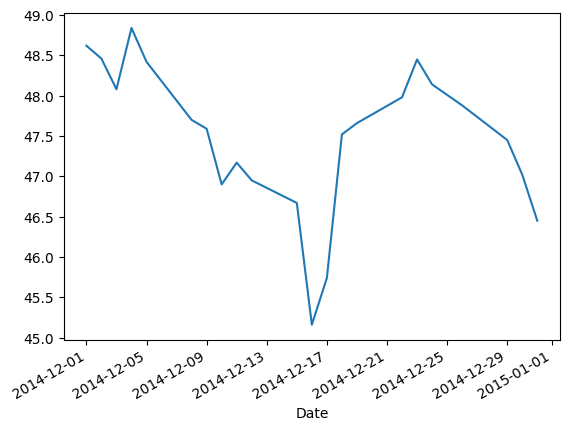

In [8]:
omh.MSFT.plot()

цена акций microsoft и apple на одном графике

<AxesSubplot: xlabel='Date'>

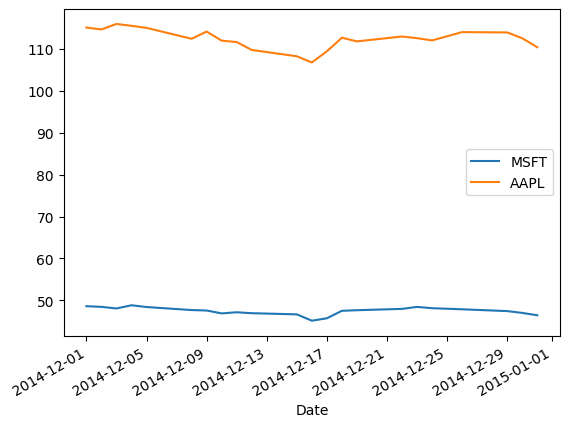

In [9]:
omh.plot()

нормализация:

<AxesSubplot: xlabel='Date'>

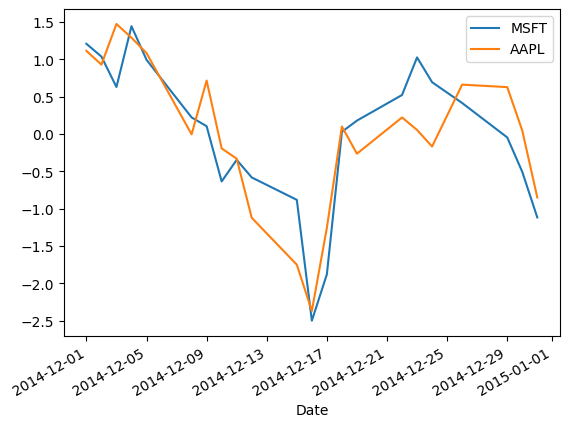

In [13]:
omh_copy =  (omh - omh.mean())/omh.std()
omh_copy.plot()

#### размер 

увеличиваем размер графика

<AxesSubplot: xlabel='Date'>

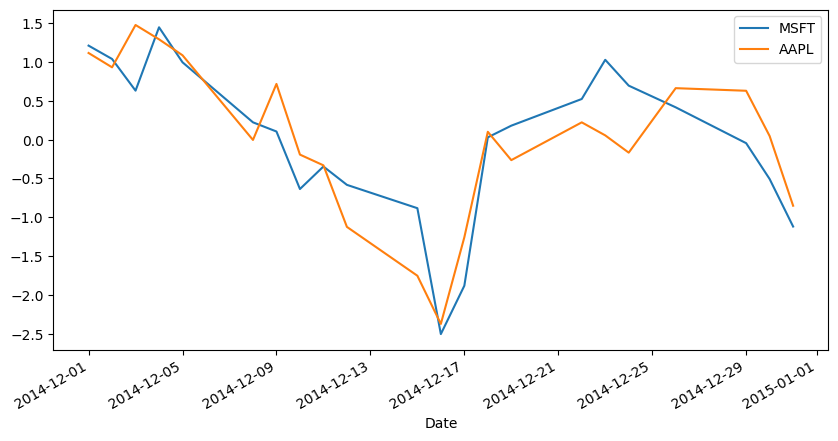

In [14]:
omh_copy.plot(figsize=(10, 5))

#### заголовок / подписи

- заголовок задаем с помощью параметра title метода .plot()
- после вызова метода .plot() явно задаем подписи осей x и y

Text(0, 0.5, 'Цена')

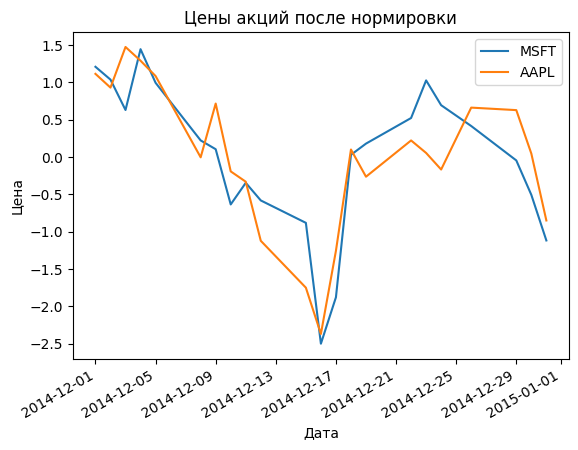

In [15]:
omh_copy.plot(title='Цены акций после нормировки')
plt.xlabel('Дата')
plt.ylabel('Цена')

#### легенда

изменяем элементы легенды, соответствующие именам столбцов датафрейма

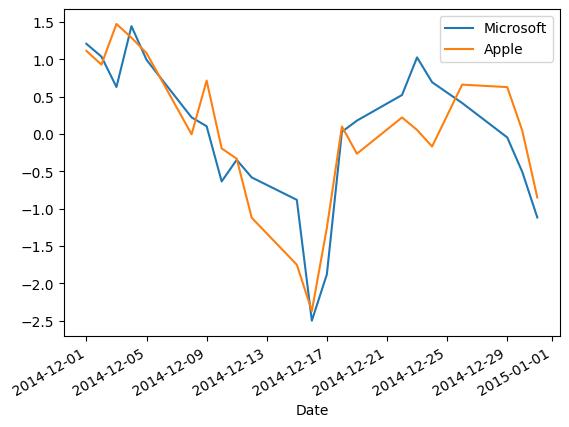

In [16]:
ax = omh_copy.plot()
ax.legend(['Microsoft', 'Apple'])

изменяем расположение легенды

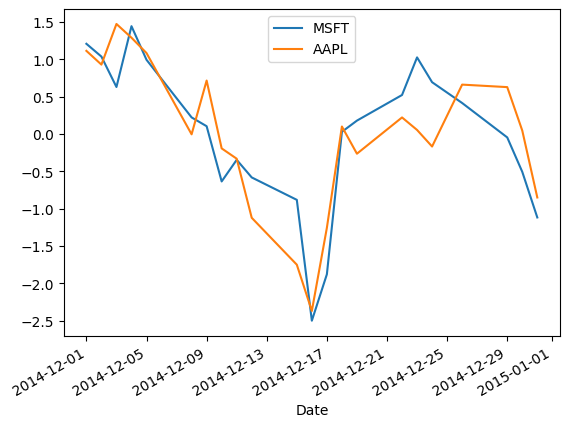

In [17]:
ax = omh_copy.plot()
ax.legend(loc='upper center')

отключаем легенду с помощью legend=False

<AxesSubplot: xlabel='Date'>

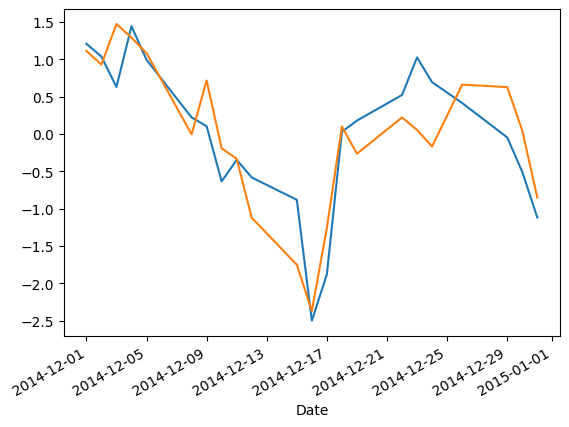

In [18]:
omh_copy.plot(legend=False)

#### цвет / стиль / толщина / маркер

меняем цвета линий графика  
[односимвольные коды](https://matplotlib.org/2.0.2/api/colors_api.html)  
[шестнадцатеричный RGB-код](https://www.rapidtables.com/web/color/RGB_Color.html)

<AxesSubplot: xlabel='Date'>

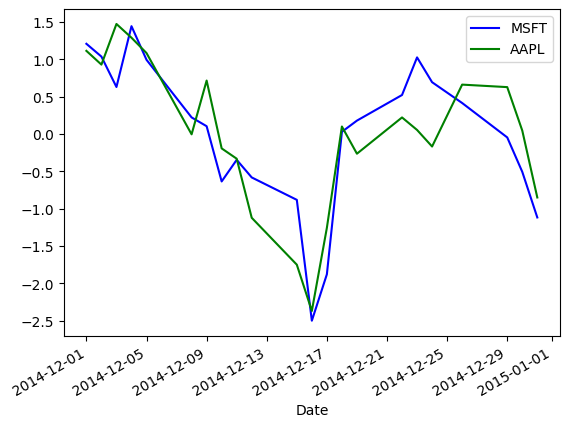

In [19]:
omh_copy.plot(style={'MSFT': '#0000FF', 'AAPL': 'g'}) 

- [различные стили линий](https://matplotlib.org/1.5.3/api/pyplot_api.html#matplotlib.pyplot.plot)  
- увеличиваем толщину линий

<AxesSubplot: xlabel='Date'>

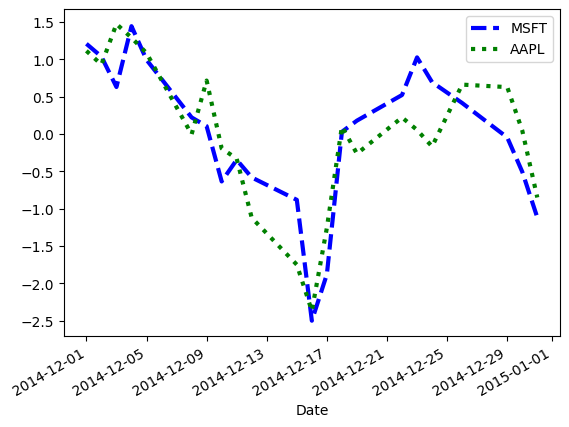

In [20]:
omh_copy.plot(style={'MSFT': 'b--', 'AAPL': 'g:'}, lw=3)

рисуем заново, добавив [маркеры](https://matplotlib.org/api/markers_api.html) линий

<AxesSubplot: xlabel='Date'>

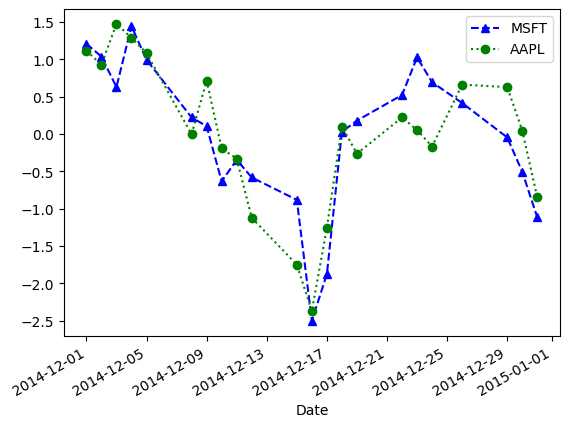

In [21]:
omh_copy.plot(style={'MSFT': 'b--^', 'AAPL': 'g:o'})

### Графики

#### bar

строим столбчатую диаграмму

<AxesSubplot: >

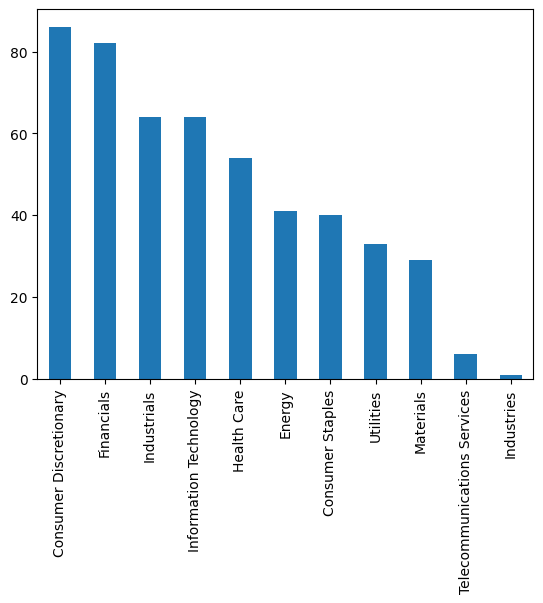

In [22]:
s = sp500.Sector.value_counts()
s.plot(kind='bar')

In [23]:
s

Consumer Discretionary         86
Financials                     82
Industrials                    64
Information Technology         64
Health Care                    54
                               ..
Consumer Staples               40
Utilities                      33
Materials                      29
Telecommunications Services     6
Industries                      1
Name: Sector, Length: 11, dtype: int64

малочисленные сектора:

In [24]:
small_sectors = s[-4:].index.values
small_sectors

array(['Utilities', 'Materials', 'Telecommunications Services',
       'Industries'], dtype=object)

95% квантиль

In [25]:
sp500.quantile(0.95)

/tmp/ipykernel_2264/3423509894.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sp500.quantile(0.95)


Price             183.8595
Dividend Yield      4.4370
Book Value         66.2591
Market Cap        134.8750
Name: 0.95, dtype: float64

создаем копию данных sp500 

In [26]:
ind = (~sp500.Sector.isin(small_sectors)) \
    & (sp500.Price < 184) \
    & (sp500['Book Value'] < 66) \
    & (sp500['Market Cap'] < 134) \
    & (sp500['Dividend Yield'] < 4.5)
ind

Symbol
MMM      True
ABT      True
ABBV     True
ACN      True
ACE     False
        ...  
YHOO    False
YUM      True
ZMH      True
ZION     True
ZTS      True
Length: 500, dtype: bool

In [27]:
sp500_cut = sp500.loc[ind].copy()

In [28]:
sp500_cut.shape

(297, 5)

строим столбчатую диаграмму на основе нескольких серий

<AxesSubplot: xlabel='Sector'>

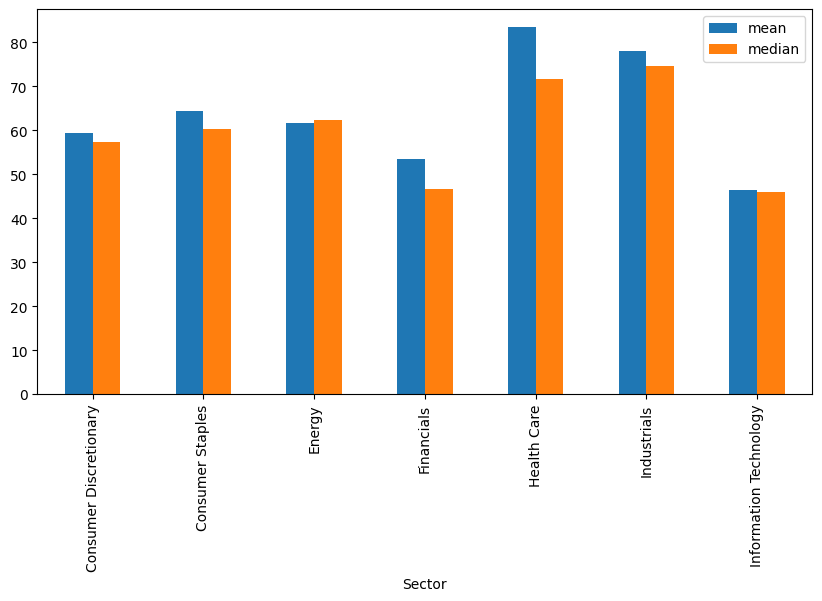

In [29]:
df = sp500_cut.groupby('Sector').Price.agg(['mean', 'median'])
df.plot(kind='bar', figsize=(10, 5))

<AxesSubplot: ylabel='Sector'>

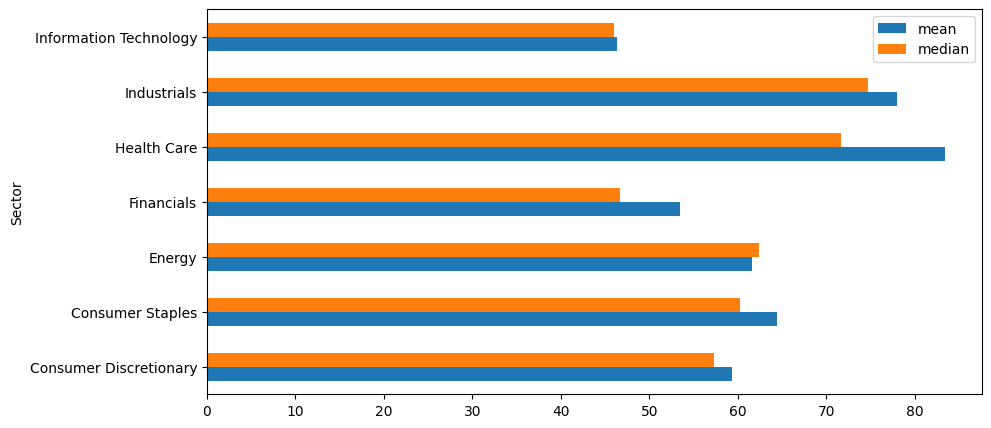

In [30]:
df.plot(kind='barh', figsize=(10, 5))

In [31]:
df

,mean,median
Sector,,
Consumer Discretionary,59.371129,57.355
Consumer Staples,64.386667,60.200
Energy,61.662857,62.395
Financials,53.487321,46.635
Health Care,83.418966,71.640
Industrials,78.002264,74.720
Information Technology,46.380528,46.005


вертикальная состыкованная столбчатая диаграмма

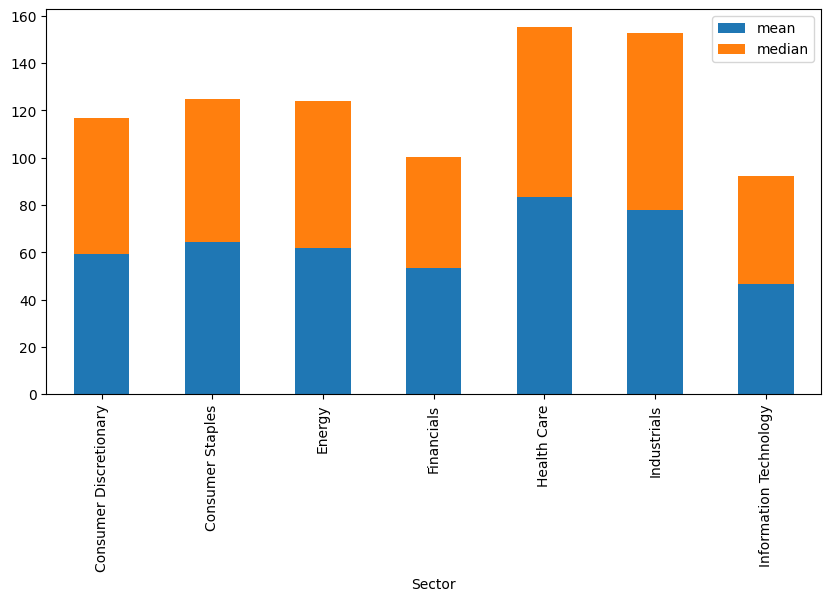

In [32]:
df.plot(kind='bar', stacked=True, figsize=(10, 5));

горизонтальная состыкованная столбиковая диаграмма

<AxesSubplot: ylabel='Sector'>

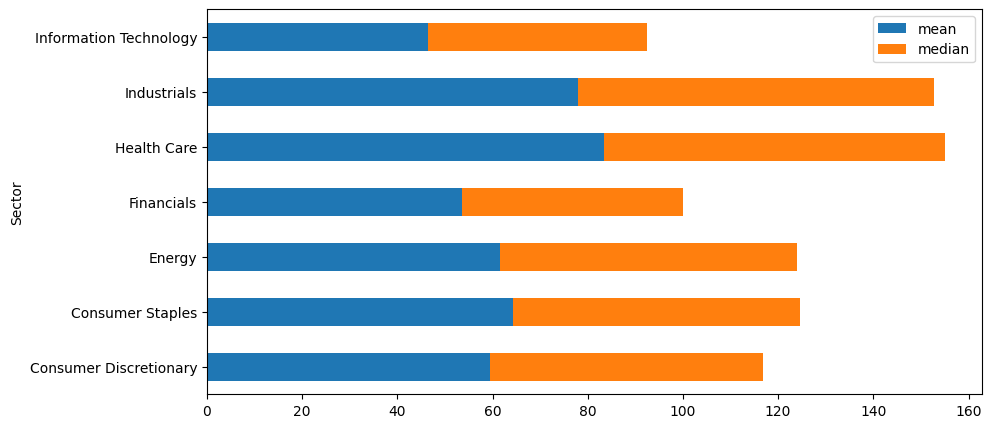

In [33]:
df.plot(kind='barh', stacked=True, figsize=(10, 5))

#### hist

строим гистограмму

<AxesSubplot: >

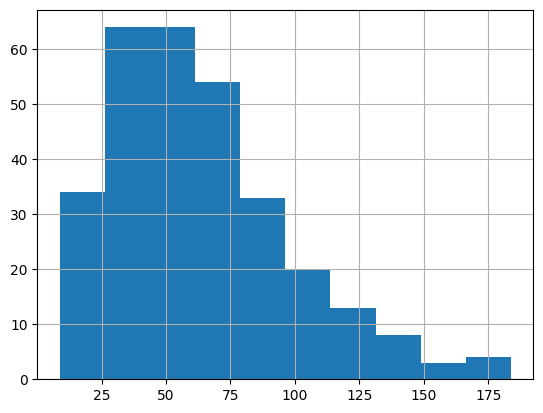

In [34]:
sp500_cut.Price.hist()

снова строим гистограмму, но теперь с большим количеством интервалов (бинов)

<AxesSubplot: >

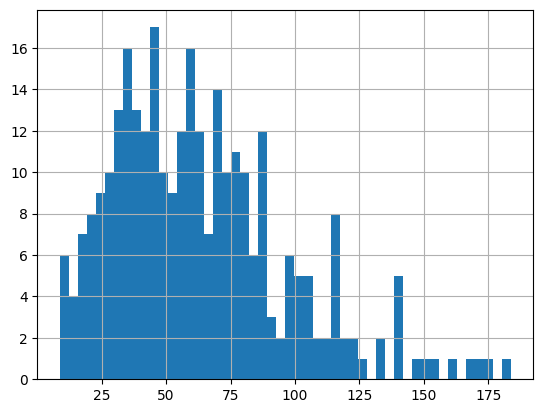

In [35]:
sp500_cut.Price.hist(bins = 50)

поскольку у нас 4 столбца, pandas строит четыре гистограммы

array([[<AxesSubplot: title={'center': 'Price'}>,
        <AxesSubplot: title={'center': 'Dividend Yield'}>],
       [<AxesSubplot: title={'center': 'Book Value'}>,
        <AxesSubplot: title={'center': 'Market Cap'}>]], dtype=object)

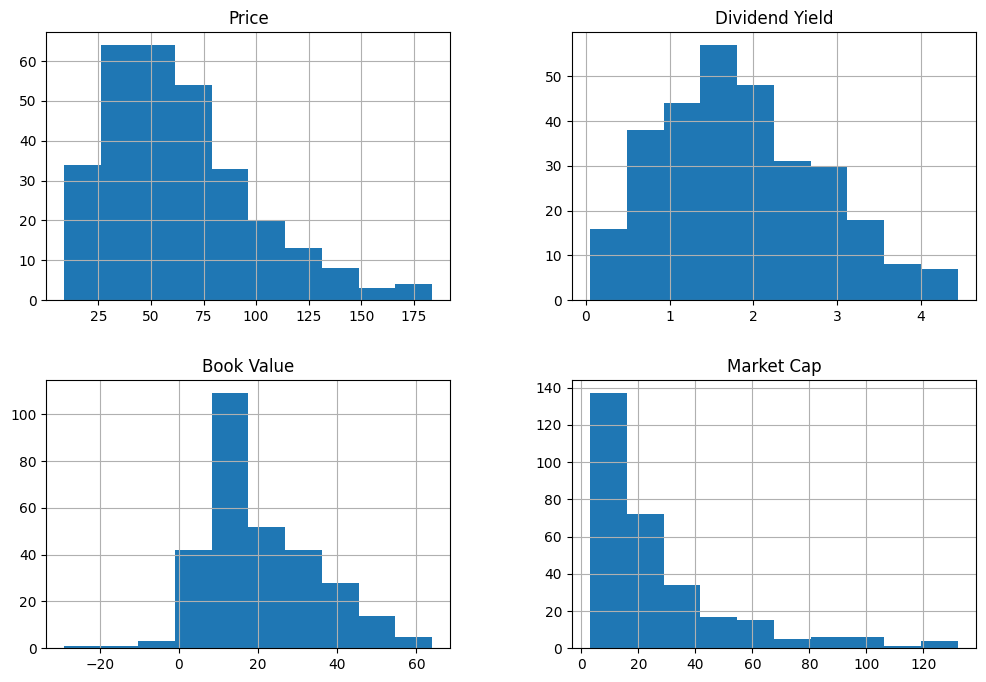

In [36]:
sp500_cut.hist(figsize=(12,8))

напрямую воспользуемся модулем pyplot  для наложения нескольких гистограмм

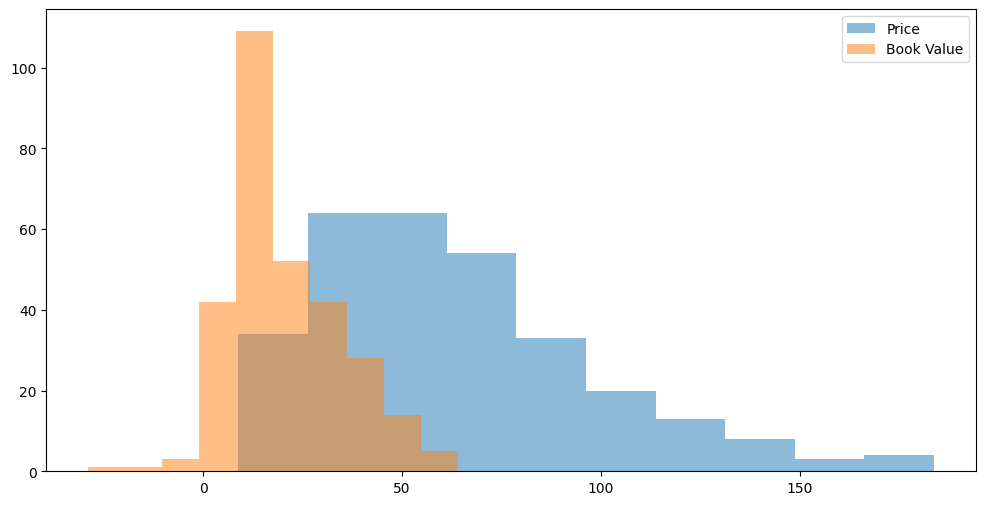

In [37]:
plt.figure(figsize=(12, 6))
plt.hist(sp500_cut.Price, alpha=0.5, label='Price')
plt.hist(sp500_cut['Book Value'], alpha=0.5, label='Book Value')
plt.legend(loc='upper right')

<AxesSubplot: ylabel='Density'>

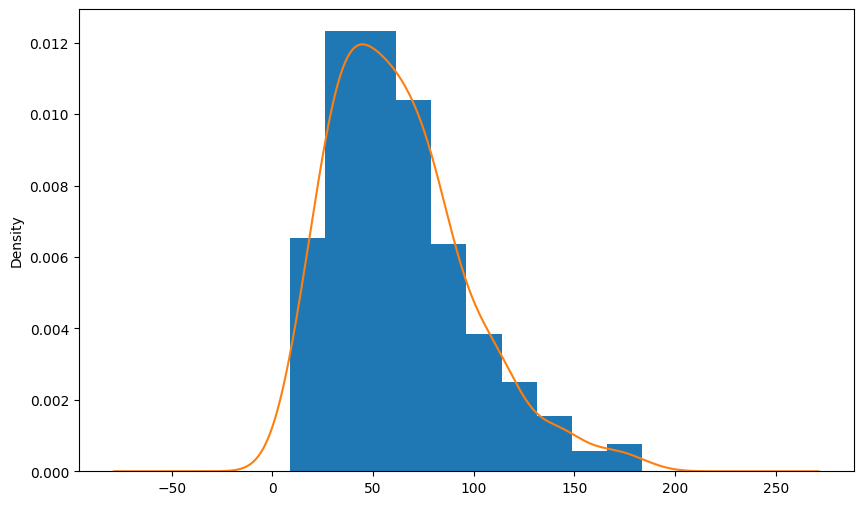

In [38]:
s = sp500_cut.Price
s.hist(density=True)
s.plot(kind='kde', figsize=(10,6))

#### box

<img src='boxplot.png'>

<AxesSubplot: >

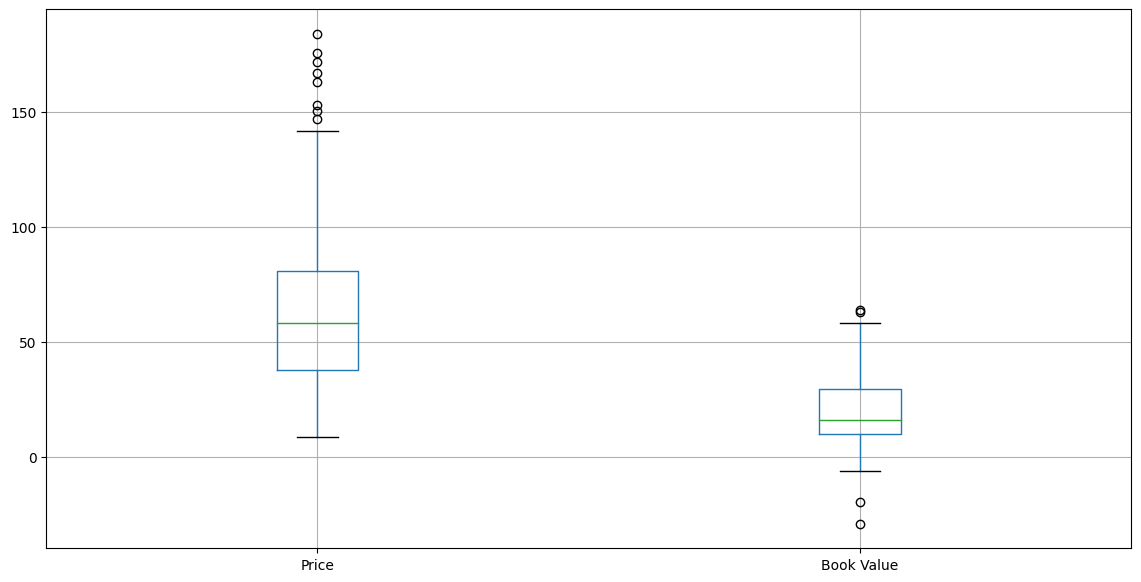

In [39]:
sp500_cut[['Price','Book Value']].boxplot(figsize = (14, 7))

#### scatter

<AxesSubplot: xlabel='Price', ylabel='Book Value'>

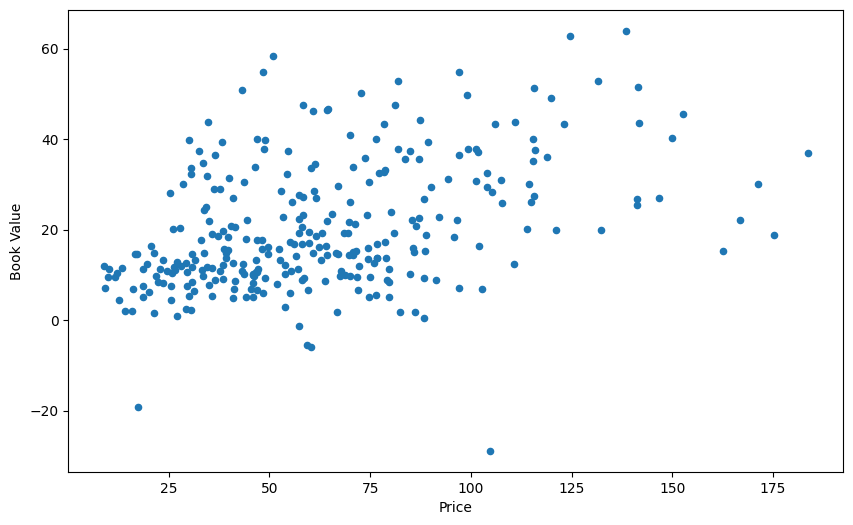

In [40]:
sp500_cut.plot(kind='scatter', x='Price', y='Book Value', figsize=(10, 6))

array([[<AxesSubplot: xlabel='Price', ylabel='Price'>,
        <AxesSubplot: xlabel='Dividend Yield', ylabel='Price'>,
        <AxesSubplot: xlabel='Book Value', ylabel='Price'>,
        <AxesSubplot: xlabel='Market Cap', ylabel='Price'>],
       [<AxesSubplot: xlabel='Price', ylabel='Dividend Yield'>,
        <AxesSubplot: xlabel='Dividend Yield', ylabel='Dividend Yield'>,
        <AxesSubplot: xlabel='Book Value', ylabel='Dividend Yield'>,
        <AxesSubplot: xlabel='Market Cap', ylabel='Dividend Yield'>],
       [<AxesSubplot: xlabel='Price', ylabel='Book Value'>,
        <AxesSubplot: xlabel='Dividend Yield', ylabel='Book Value'>,
        <AxesSubplot: xlabel='Book Value', ylabel='Book Value'>,
        <AxesSubplot: xlabel='Market Cap', ylabel='Book Value'>],
       [<AxesSubplot: xlabel='Price', ylabel='Market Cap'>,
        <AxesSubplot: xlabel='Dividend Yield', ylabel='Market Cap'>,
        <AxesSubplot: xlabel='Book Value', ylabel='Market Cap'>,
        <AxesSubplot: xlabel='

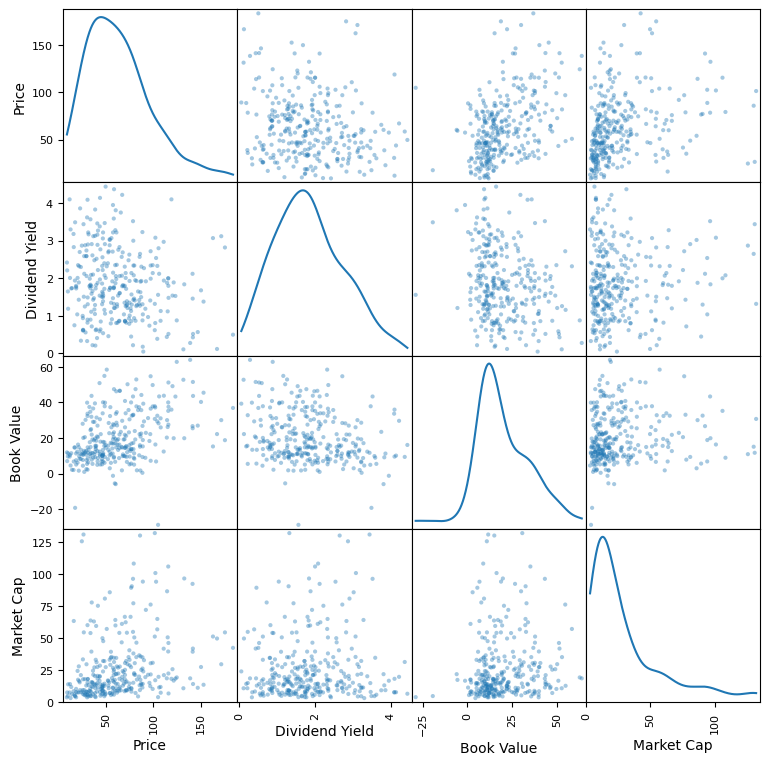

In [41]:
from pandas.plotting import scatter_matrix
scatter_matrix(sp500_cut, alpha=0.4, figsize=(9, 9), diagonal='kde')

#### heat map

In [42]:
corr_matrix = sp500_cut.corr()
corr_matrix

/tmp/ipykernel_2264/1840185360.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = sp500_cut.corr()


,Price,Dividend Yield,Book Value,Market Cap
Price,1.000000,-0.185011,0.422380,0.280692
Dividend Yield,-0.185011,1.000000,-0.225360,0.049791
Book Value,0.422380,-0.225360,1.000000,0.081881
Market Cap,0.280692,0.049791,0.081881,1.000000


([<matplotlib.axis.YTick at 0x7f4770b93280>,
 [Text(0, 0, 'Price'),
  Text(0, 1, 'Dividend Yield'),
  Text(0, 2, 'Book Value'),
  Text(0, 3, 'Market Cap')])

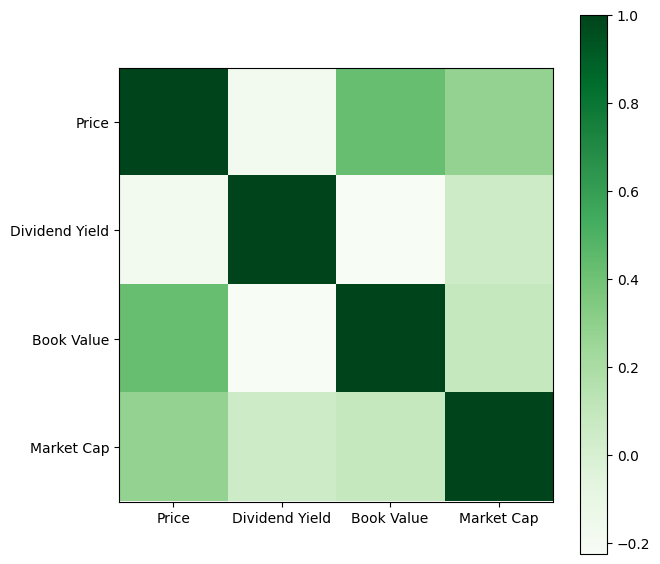

In [43]:
plt.figure(figsize=(7, 7))
plt.imshow(corr_matrix, cmap='Greens')
plt.colorbar()  # добавим шкалу интенсивности цвета

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix)), corr_matrix.index)